# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

2024-06-10 10:37:07.348268: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 10:37:07.355122: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-10 10:37:07.465267: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 10:37:09.736666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [69]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
#tma.clear_directory(text_curater="0.20")

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

Preparing to delete 2 files
First 10 file names to be deleted
-------------------------------------------------
['/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/hepatitis/JLMA(r42)_AP(0.2001)_29.npy', '/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/seeds/JLMA(r42)_AP(0.2001)_38.npy']
Files Deleted.


True

In [2]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split= "random", percent_of_anchors= [0.3], verbose=2)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = False)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
test.run_PCR_tests()


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data randomly
Split A features shape: (150, 3)
Split B Features shape (150, 1)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)
<><><><><>    File /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/iris/PCR(r42)_AP(0.3)_38.npy already exists   <><><><><>


True

In [70]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

/yunity/arusty/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or

In [17]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [26]:
subset_df(df, method = "DIG").sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
1254460,S-curve,DIG,2816,even,47,0.19,0.3,off-diagonal,4.084538,NaN,NaN,0.108000,0.900000,0.866667,0.983333,0.792000
568021,blobs,DIG,2504,even,65,0.19,0.15,None,2.546663,NaN,NaN,0.379644,0.686667,0.700000,0.577778,0.307022
79980,ionosphere,DIG,9941,skewed,2,0.01,0.1,off-diagonal,0.174835,NaN,NaN,0.276167,0.843305,NaN,NaN,0.567138
841400,Cancer_Data,DIG,3340,random,14,0.03,0.2,off-diagonal,0.095584,NaN,NaN,0.037531,0.947276,NaN,NaN,0.909745
87640,ionosphere,DIG,5959,even,2,0.01,0.1,off-diagonal,0.173439,NaN,NaN,0.163221,0.840456,NaN,NaN,0.677235


In [6]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 1044310


 Method        Lengths
--------      ----------
 JLMA:          101540
 MAGAN:          1720
 SSMA:          83118
 DTA:          82354
 Nama:          6020
 SPUD:          505588
 DIG:          248258


----------------------       Splits      ----------------------
Total data of random: 164981

 random        Lengths
--------      ----------
 MAGAN:          340
 SSMA:          14730
 JLMA:          15730
 DTA:          14680
 Nama:          1461
 SPUD:          71270
 DIG:          46760


Total data of even: 391967

 even        Lengths
--------      ----------
 MAGAN:          360
 SSMA:          28078
 JLMA:          39010
 DTA:          27364
 Nama:          527
 SPUD:          192498
 DIG:          97368


Total data of skewed: 182260

 skewed        Lengths
----

# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

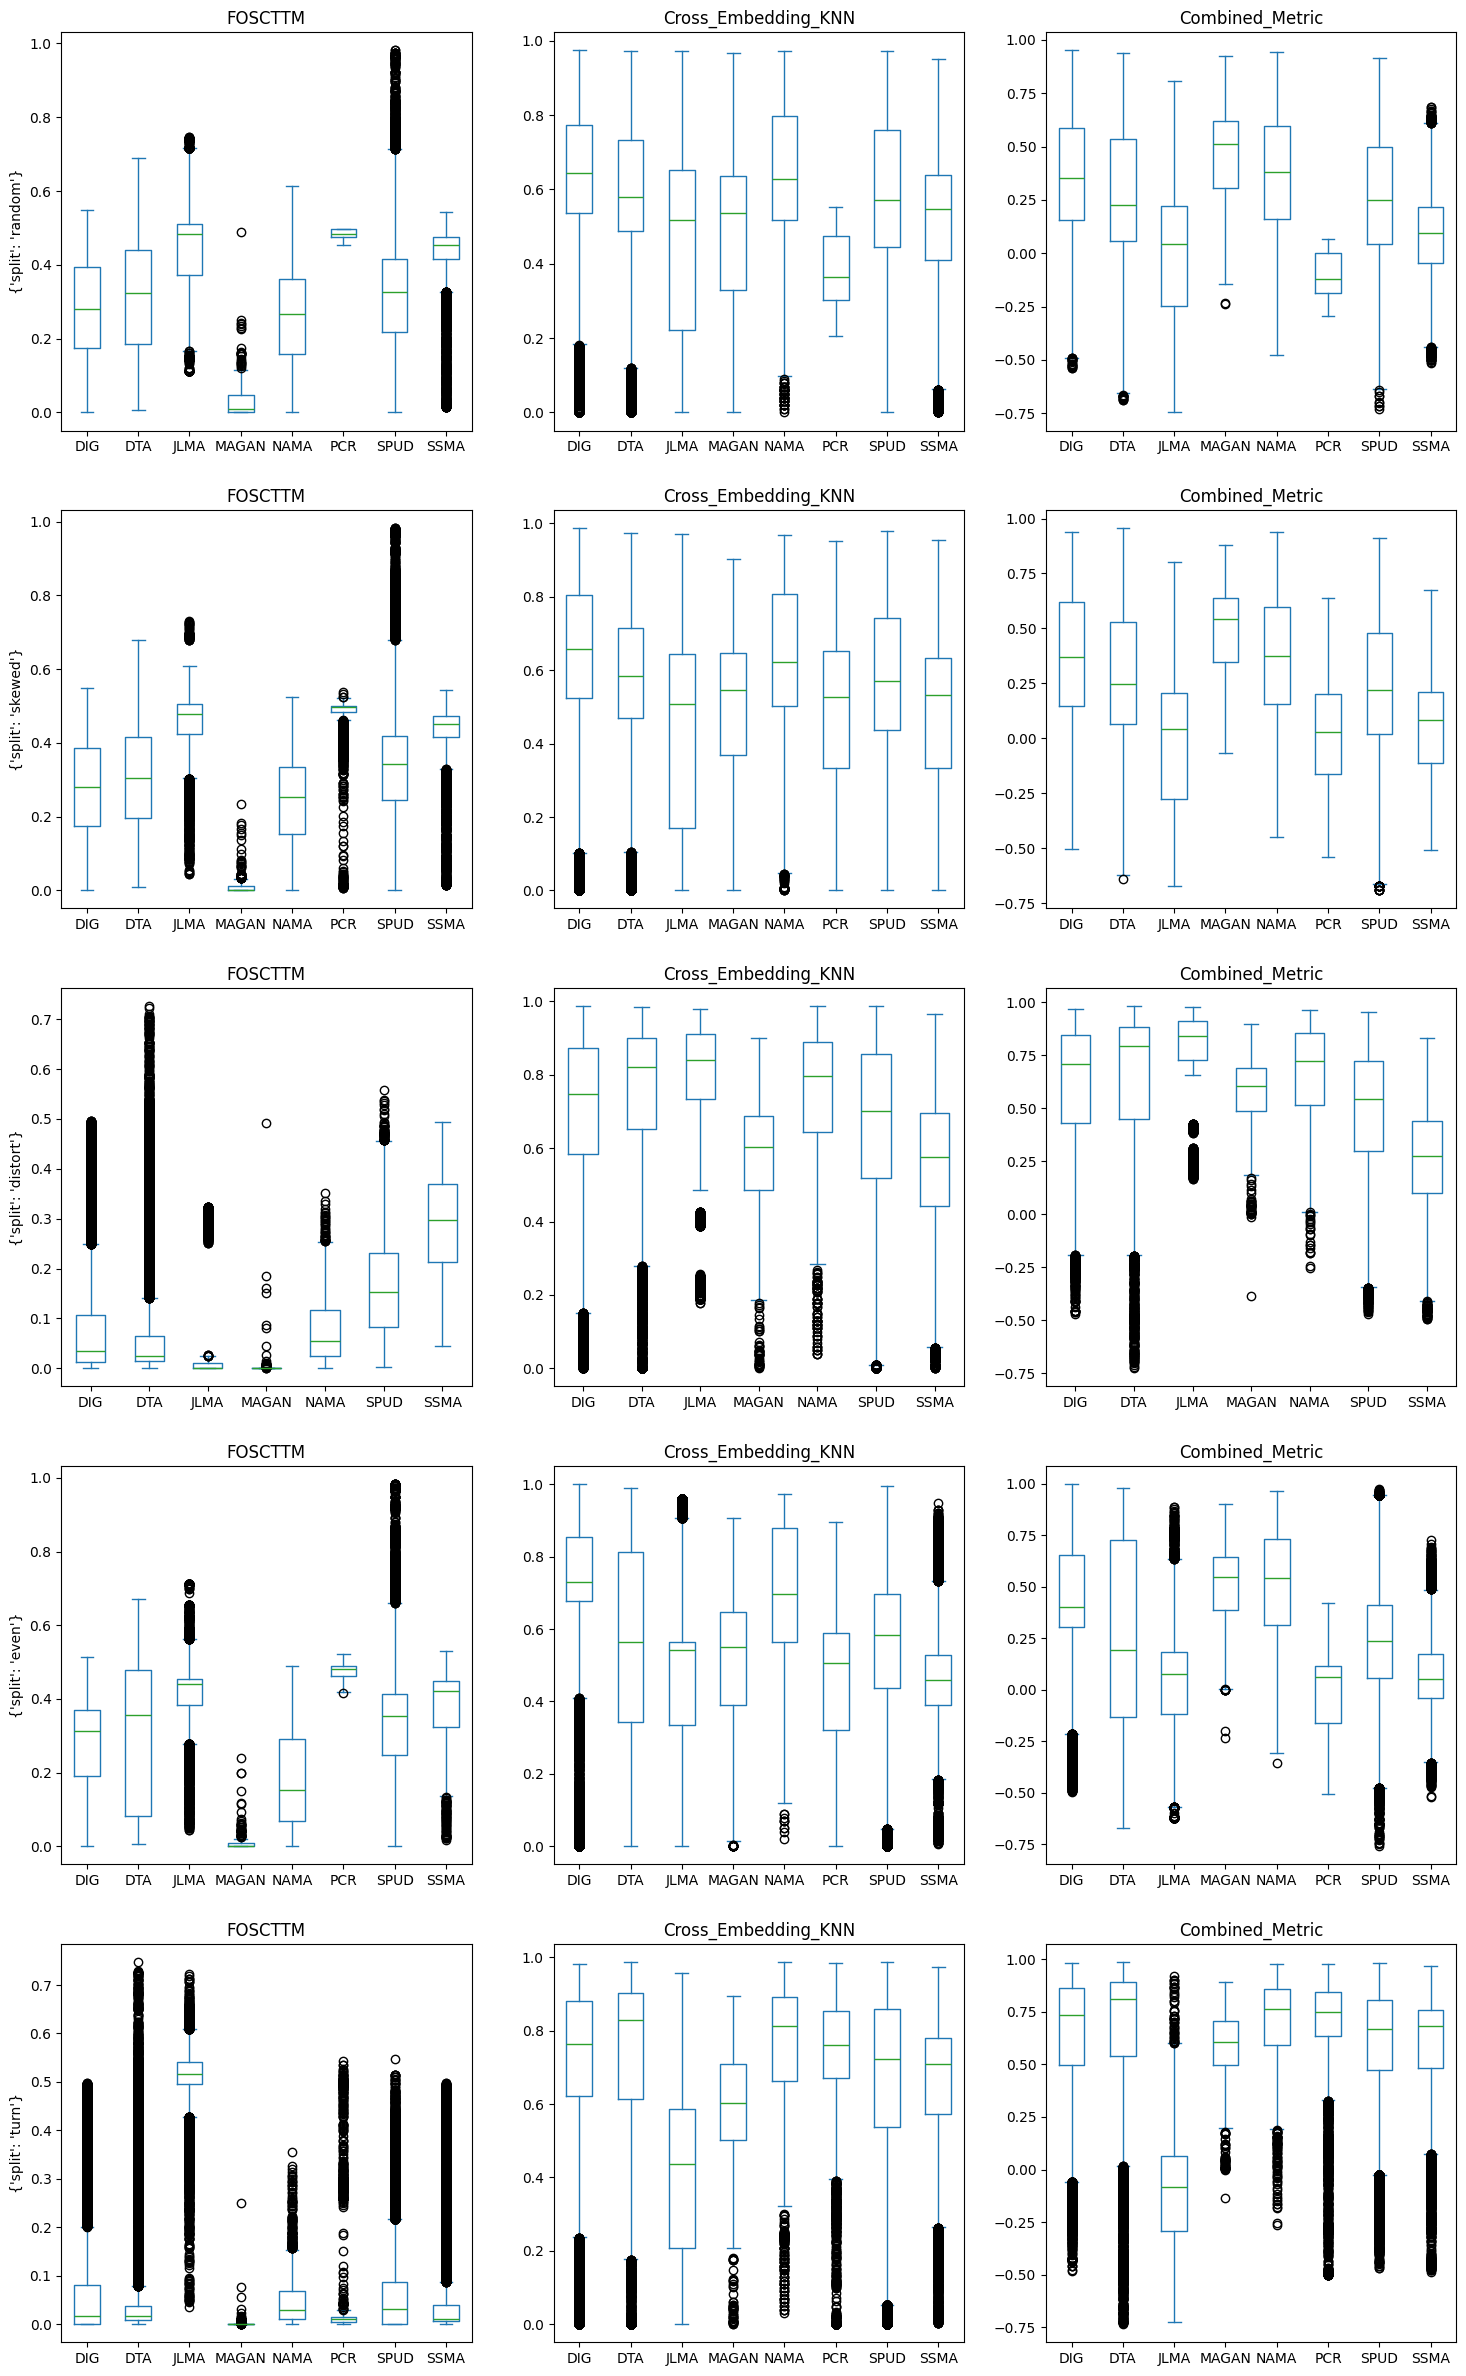

In [27]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [28]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [29]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
276773,ecoli_5,DIG,7205,skewed,30,0.09,0.1,None,0.084860,NaN,NaN,0.272003,0.770642,NaN,NaN,0.498639
763252,blobs,DIG,2504,even,65,0.19,0.1,full,2.576166,NaN,NaN,0.447678,0.673333,0.644444,0.588889,0.225656
143762,tic-tac-toe,DIG,6454,turn,62,0.07,0.3,off-diagonal,0.535971,NaN,NaN,0.000000,0.865344,NaN,NaN,0.865344
306783,hill_valley,DIG,9595,distort,41,0.07,0.5,full,0.122673,NaN,NaN,0.145364,0.539604,NaN,NaN,0.394240
494936,winequality-red,DIG,5198,skewed,290,0.19,0.3,off-diagonal,0.097013,NaN,NaN,0.270192,0.080050,0.031250,0.050000,-0.190142


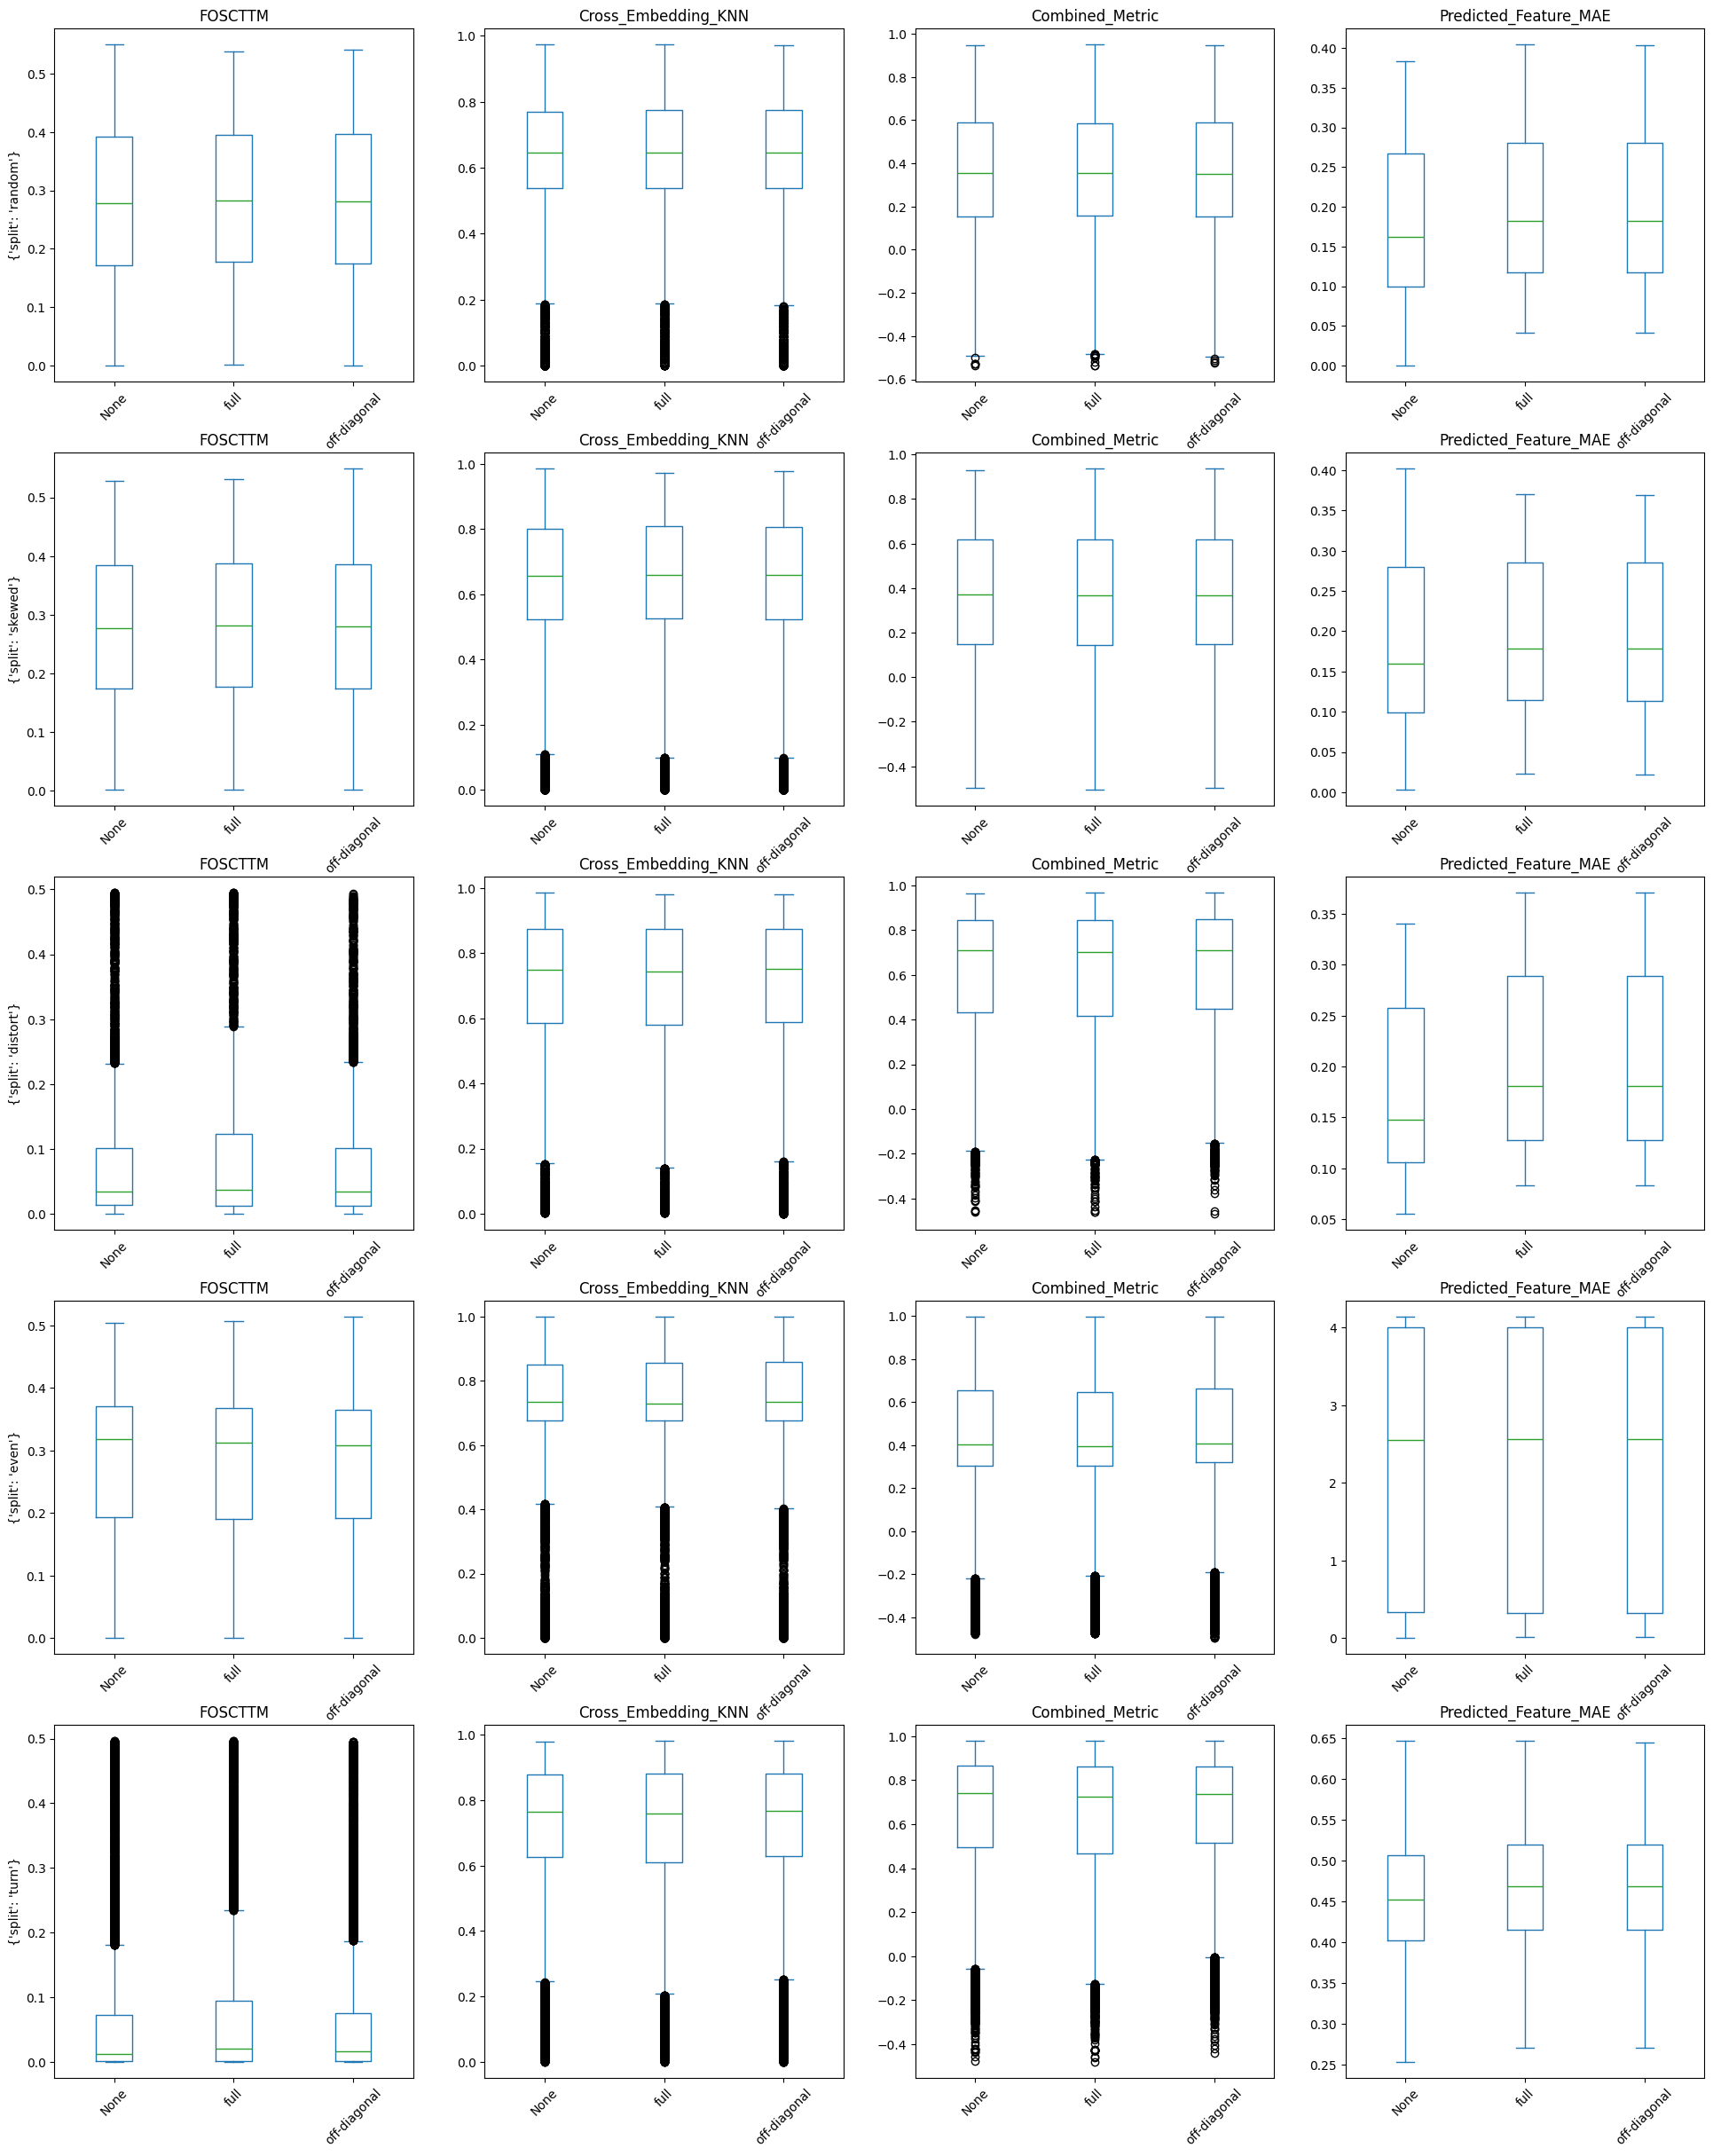

In [30]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

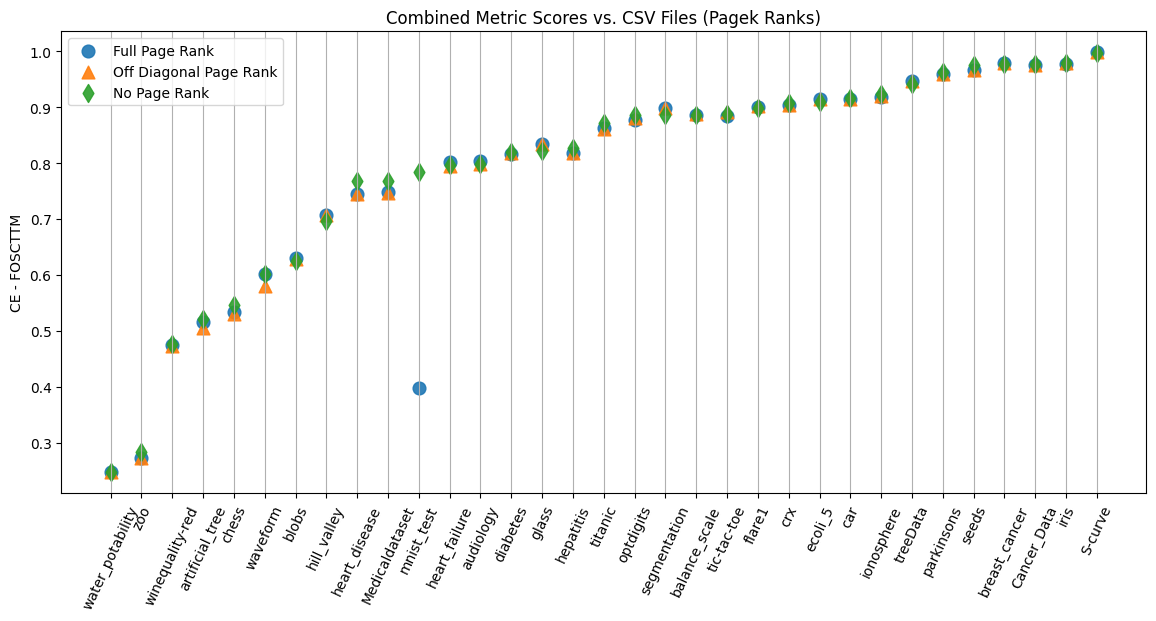

In [31]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

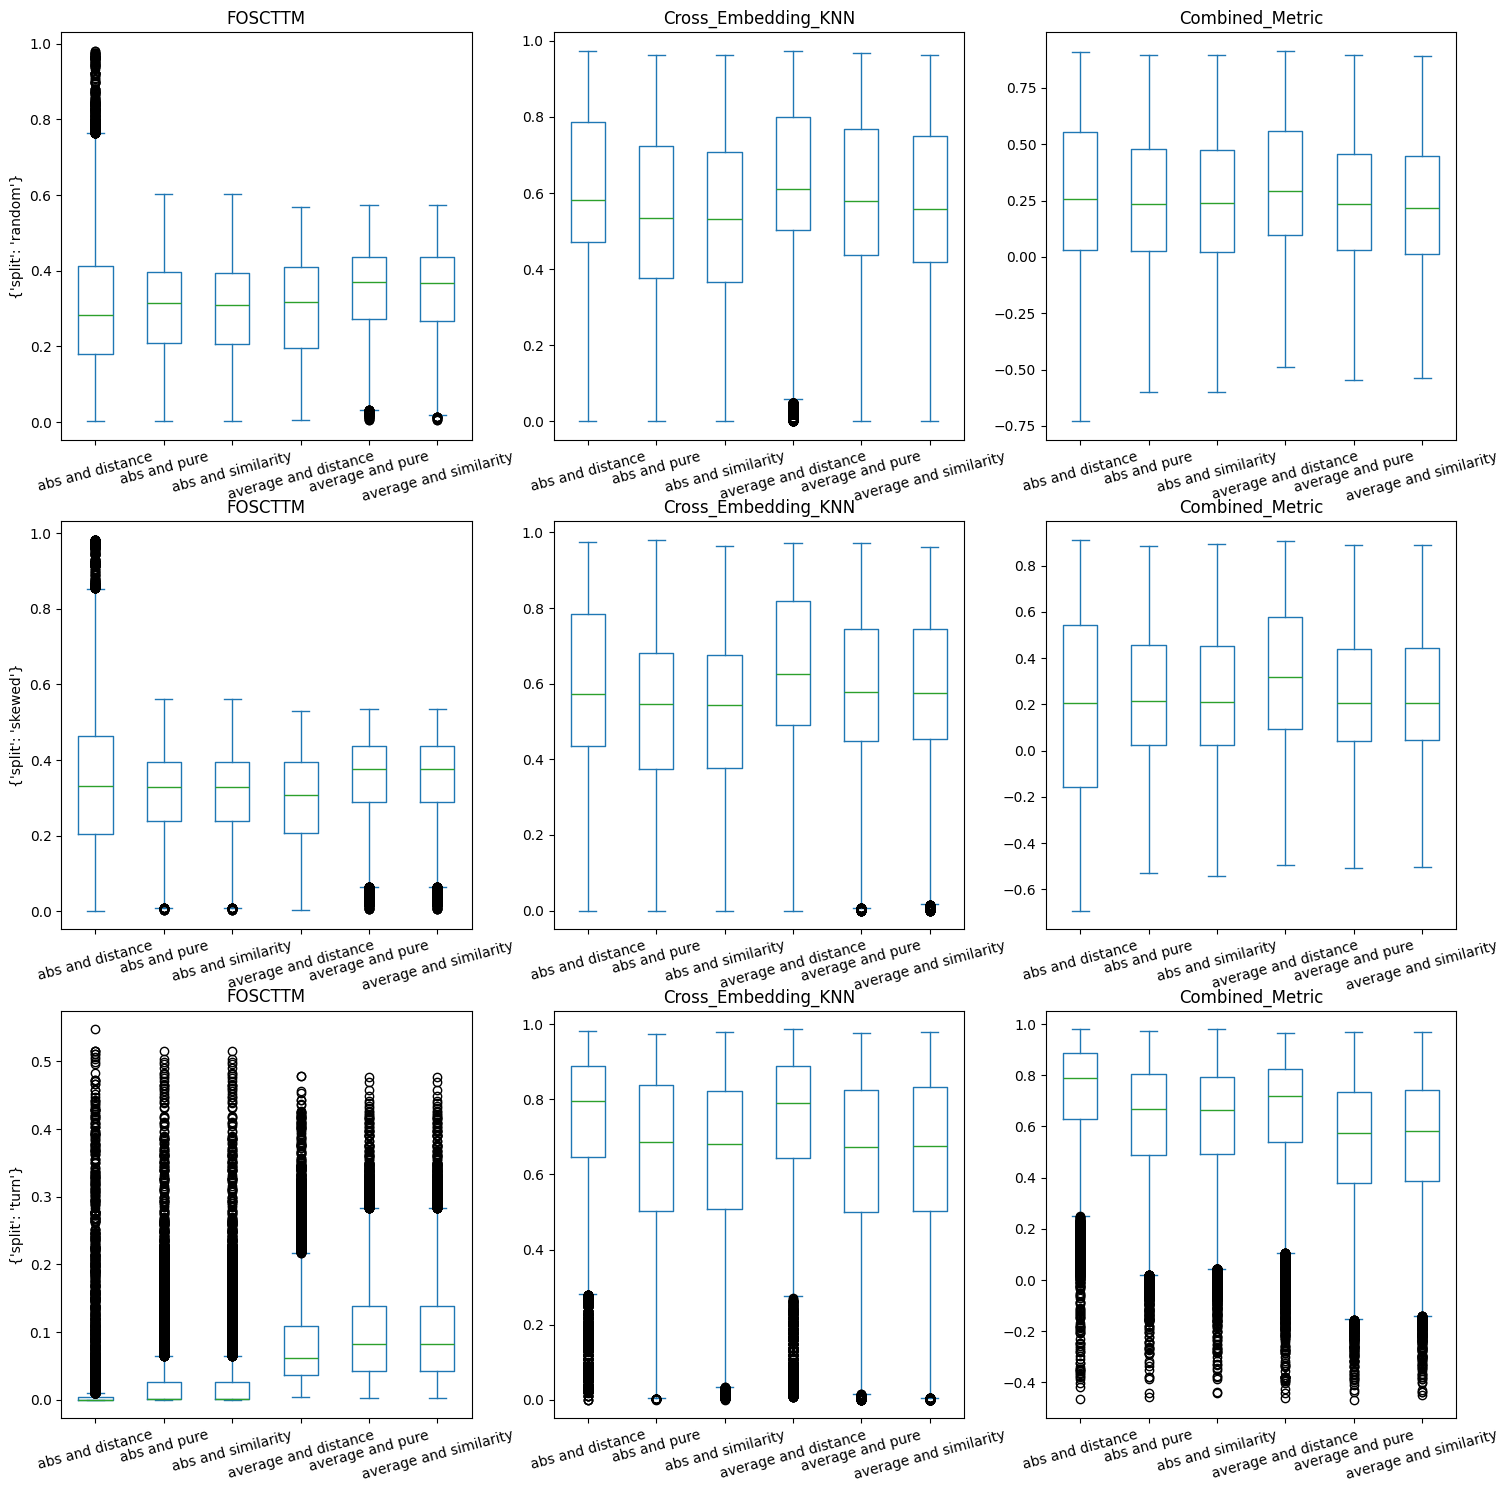

In [32]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [33]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].max(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', label = "MAGAN", **key_words)
    ax = plt.scatter(y = agregate_df["JLMA"], marker = 'o', label = "JLMA", **key_words)
    ax = plt.scatter(y = agregate_df["PCR"], marker = 'v', label = "Procrutees", **key_words)



    #Plot the ground truths
    ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)
    ax = plt.scatter(y = agregate_df["Split_B"], marker = '.', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

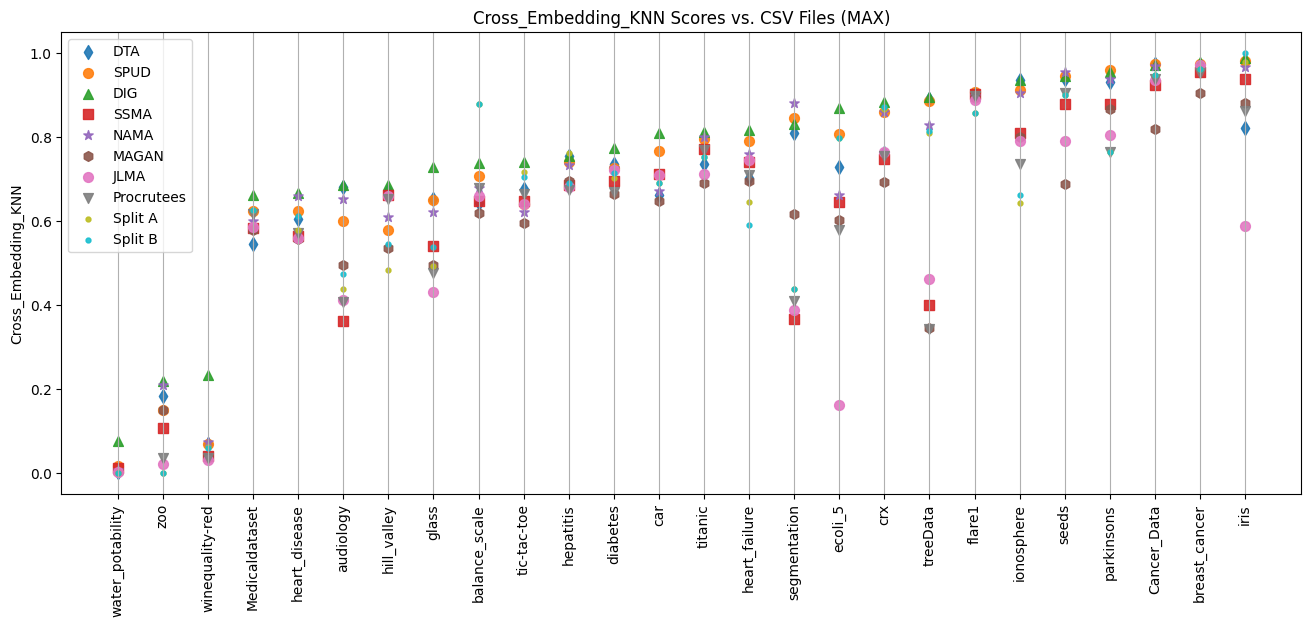

In [34]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG")

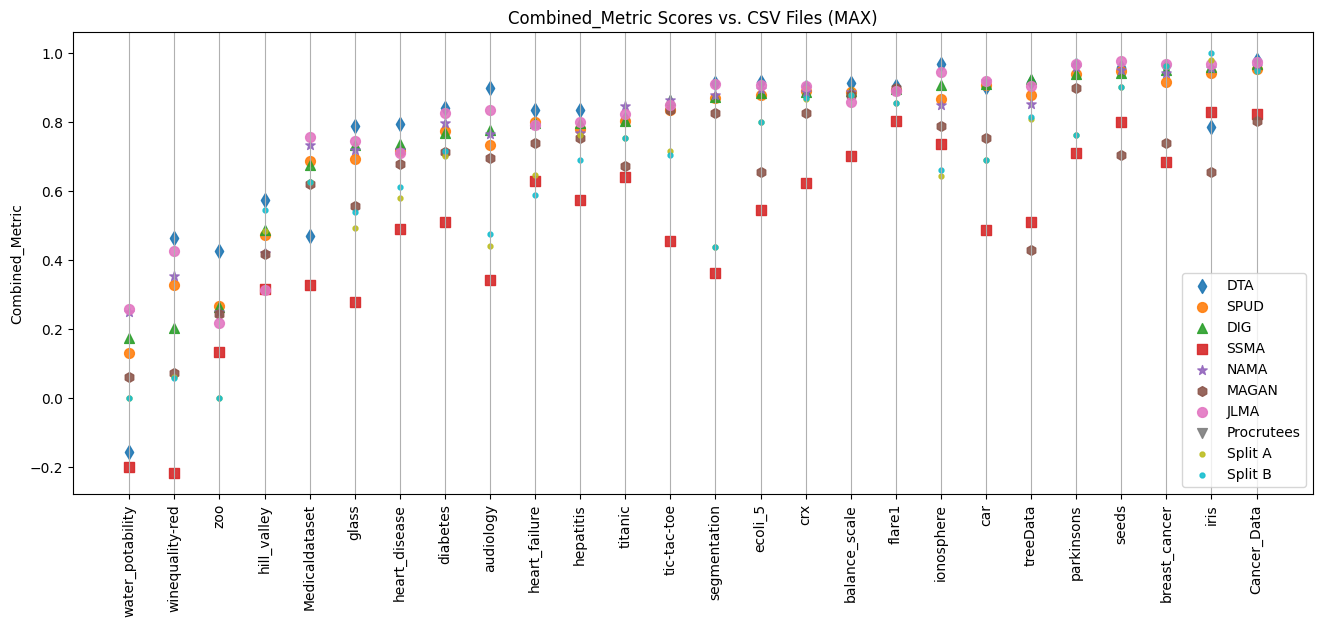

In [35]:
plt_methods_by_CSV_max(df = subset_df(df, split = "distort"), sort_by="DIG")

In [36]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["PCR"], yerr = err_df["PCR"], fmt = ".", label = "Procrustees", **key_words) 




    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.4, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

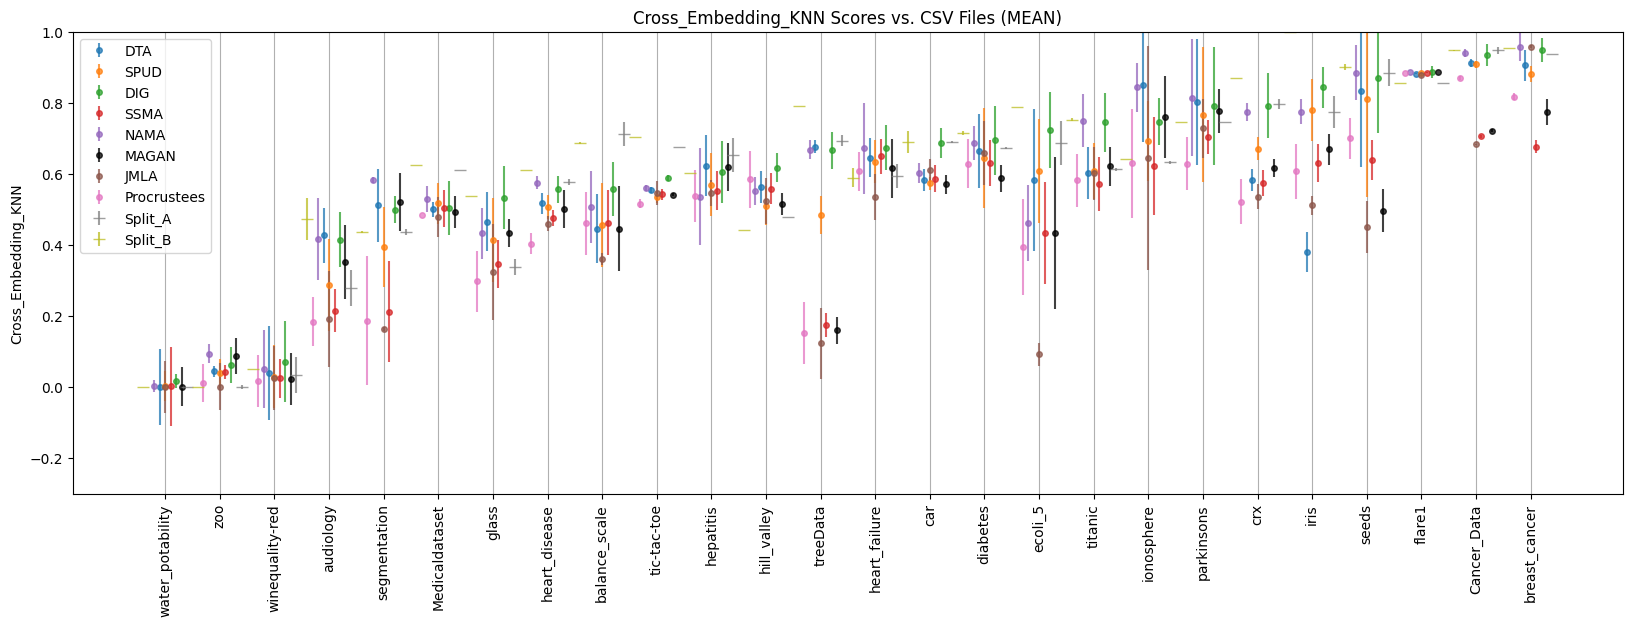

In [37]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Cross_Embedding_KNN", sort_by="DIG")

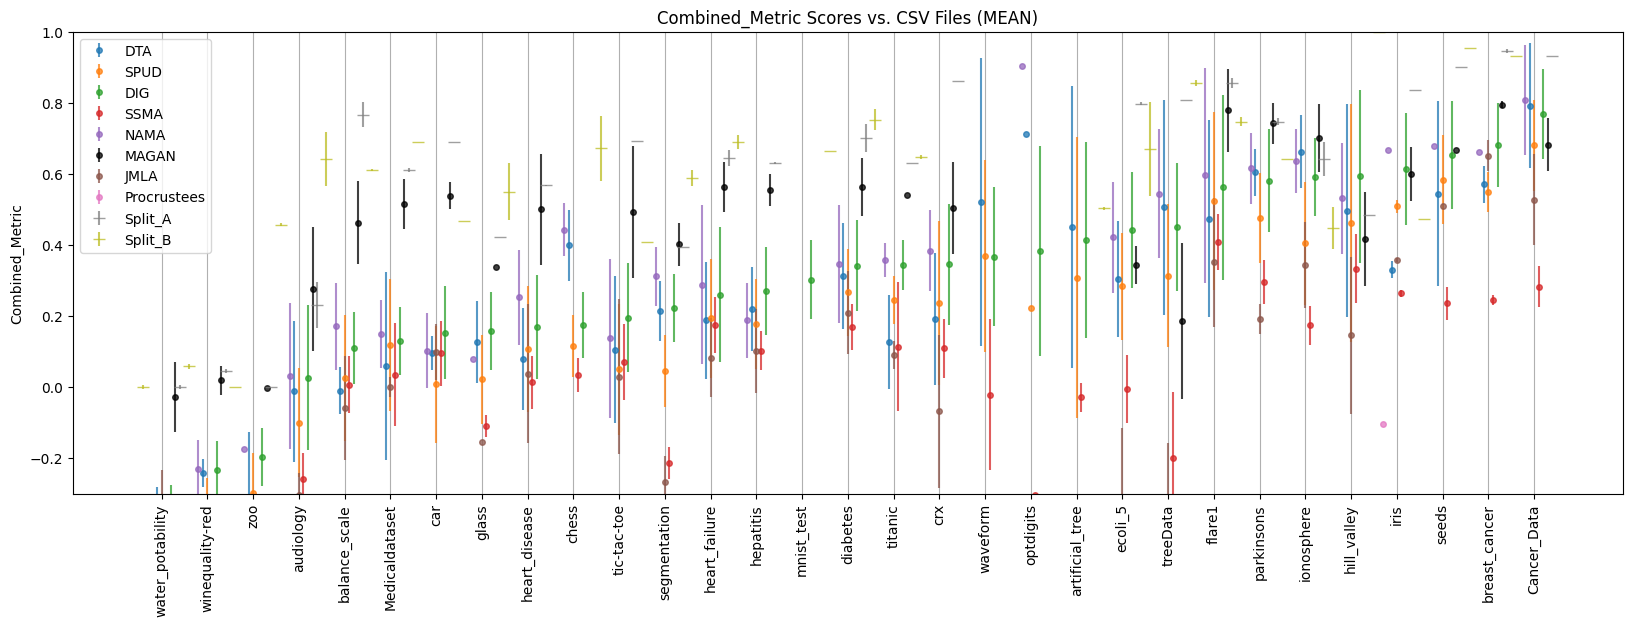

In [38]:
plt_methods_by_CSV_mean(df = subset_df(df, split = "random"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [58]:
#### STILL WORKING ON THE UPDATES TO THIS FUNCTION ____ TRYING TO IMPLEMENT A MEASURE OF DISTANCE FROM SPLITS

def get_ranks(show_more = False, **kwargs):
    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    df_ranked = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).rank(ascending=False, method='max', axis = 1)


    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Print out the distance from the Split_a and Split b baseling

    #Get th csv file with Cross embedding as th max
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").fillna(0)
    d1 = len(csv_df)
    columns = csv_df.columns[1:-2]

    #Drop the SPlits from the df
    methods_df = csv_df.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,8)), columns = columns))

    #Give their rank as well
    print(f"\n  Rank by distance from the Baselines\n-------------------------------------------")
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,8)), columns = columns).rank(ascending=False, method='max', axis = 1))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df["csv_file"]))



In [59]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks()

Ranked across No Split
-----------------------
DTA      2.468750
DIG      2.606061
SPUD     3.843750
PCR      4.392857
NAMA     4.633333
JLMA     4.678571
SSMA     5.875000
MAGAN    6.821429
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG      NAMA       PCR  \
0  0.124034  0.025811  0.225183  0.222457  0.251595  0.170352  0.115667   

       JLMA  
0  0.090839  

  Rank by distance from the Baselines
-------------------------------------------
   SSMA  MAGAN  DTA  SPUD  DIG  NAMA  PCR  JLMA
0   5.0    8.0  2.0   3.0  1.0   4.0  6.0   7.0


In [43]:
get_ranks(split = "random")

Ranked across random Split
-----------------------
DIG      2.322581
MAGAN    2.423077
NAMA     3.071429
SPUD     3.166667
DTA      3.766667
SSMA     6.033333
JLMA     6.500000
PCR      8.000000
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN      DTA      SPUD       DIG      NAMA       PCR  \
0  0.034329 -0.031438  0.13235  0.144155  0.193286  0.094168 -0.531099   

       JLMA  
0 -0.042622  

  Rank by distance from the Baselines
-------------------------------------------
   SSMA  MAGAN  DTA  SPUD  DIG  NAMA  PCR  JLMA
0   5.0    6.0  3.0   2.0  1.0   4.0  8.0   7.0


In [44]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
DIG      2.107143
MAGAN    2.535714
NAMA     2.555556
SPUD     3.392857
DTA      3.611111
JLMA     5.642857
SSMA     6.277778
PCR      7.000000
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN      DTA      SPUD      DIG      NAMA       PCR  \
0 -0.247968 -0.058279 -0.18399  0.047165  0.07581 -0.173283 -0.585541   

       JLMA  
0 -0.084194  

  Rank by distance from the Baselines
-------------------------------------------
   SSMA  MAGAN  DTA  SPUD  DIG  NAMA  PCR  JLMA
0   7.0    3.0  6.0   2.0  1.0   5.0  8.0   4.0


In [45]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
DIG      2.115385
MAGAN    2.240000
NAMA     3.000000
SPUD     3.769231
DTA      4.076923
SSMA     6.307692
JLMA     6.807692
PCR      7.416667
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD      DIG      NAMA       PCR  \
0 -0.031128 -0.056194  0.036554  0.057483  0.09691  0.047297 -0.074112   

       JLMA  
0 -0.073634  

  Rank by distance from the Baselines
-------------------------------------------
   SSMA  MAGAN  DTA  SPUD  DIG  NAMA  PCR  JLMA
0   5.0    6.0  4.0   2.0  1.0   3.0  8.0   7.0


In [46]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
DTA      2.115385
JLMA     2.653846
DIG      3.230769
NAMA     3.384615
SPUD     4.038462
MAGAN    5.807692
SSMA     6.769231
PCR           NaN
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD      DIG      NAMA       PCR  \
0  0.004069 -0.000882  0.159704  0.139819  0.13088  0.139106 -0.654535   

       JLMA  
0  0.145578  

  Rank by distance from the Baselines
-------------------------------------------
   SSMA  MAGAN  DTA  SPUD  DIG  NAMA  PCR  JLMA
0   6.0    7.0  1.0   3.0  5.0   4.0  8.0   2.0


In [47]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
DTA      2.307692
DIG      2.384615
SPUD     3.500000
PCR      3.576923
NAMA     4.615385
SSMA     5.115385
MAGAN    6.640000
JLMA     7.846154
dtype: float64



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA      SPUD       DIG      NAMA       PCR  \
0  0.107546 -0.009544  0.175009  0.155932  0.165484  0.145612  0.155056   

       JLMA  
0 -0.018544  

  Rank by distance from the Baselines
-------------------------------------------
   SSMA  MAGAN  DTA  SPUD  DIG  NAMA  PCR  JLMA
0   6.0    7.0  1.0   3.0  2.0   5.0  4.0   8.0


## Comparing Percent of anchors and KNN values

In [60]:
def line_plot_methods(argument = "Percent_of_Anchors", metric = "Combined_Metric",   **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)[metric].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)[metric].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)[metric].mean(), label = "DIG")
    plt.plot(df_subset[df_subset["method"] == "JLMA"].groupby(argument)[metric].mean(), label = "JLMA")
    plt.plot(df_subset[df_subset["method"] == "MAGAN"].groupby(argument)[metric].mean(), label = "MAGAN")
    plt.plot(df_subset[df_subset["method"] == "PCR"].groupby(argument)[metric].mean(), label = "Procrustees")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)[metric].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)[metric].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)[metric].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel(metric)
    plt.legend()
    plt.title("Methods Together")

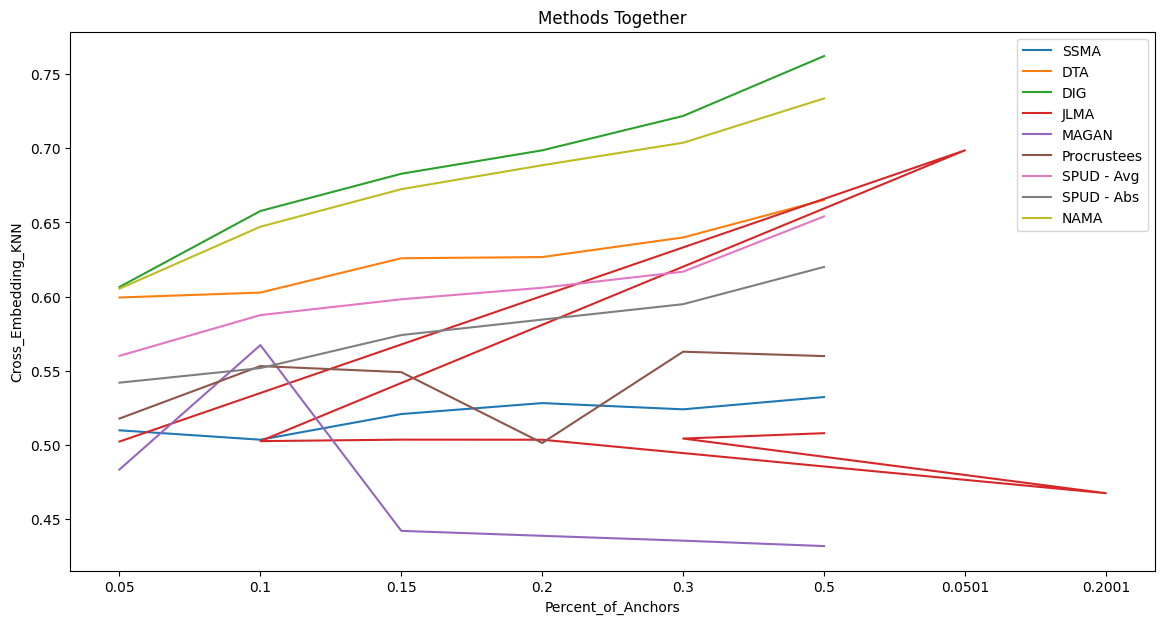

In [61]:
line_plot_methods(metric = "Cross_Embedding_KNN")

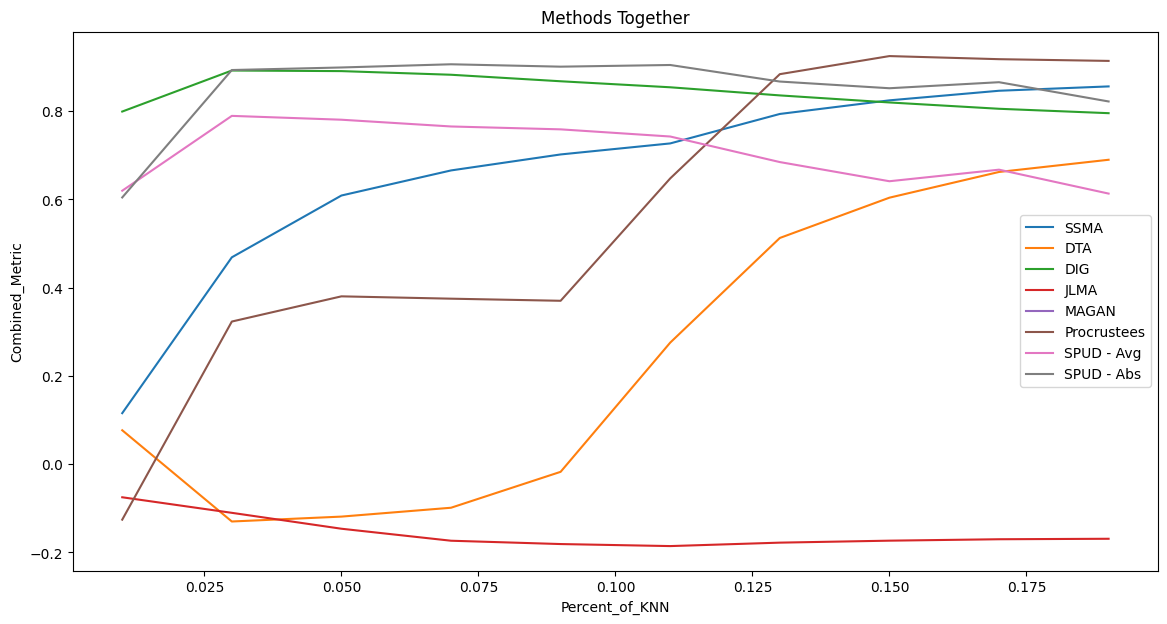

In [62]:
line_plot_methods(argument = "Percent_of_KNN", split = "turn", csv_file = "iris")

## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [63]:
visual_test = tma.test_manifold_algorithms(csv_file="ecoli_5.csv", split= "even", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with ecoli_5.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (327, 4)
Split B Features shape (327, 3)
MDS initialized with 3 components
The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:283: RuntimeWarning: Detected zero distance between samples 2 and 32, 6 and 82, 26 and 66, 31 and 80, 31 and 90, 33 and 127, 38 and 291, 80 and 90. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 25 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 40 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 66 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings

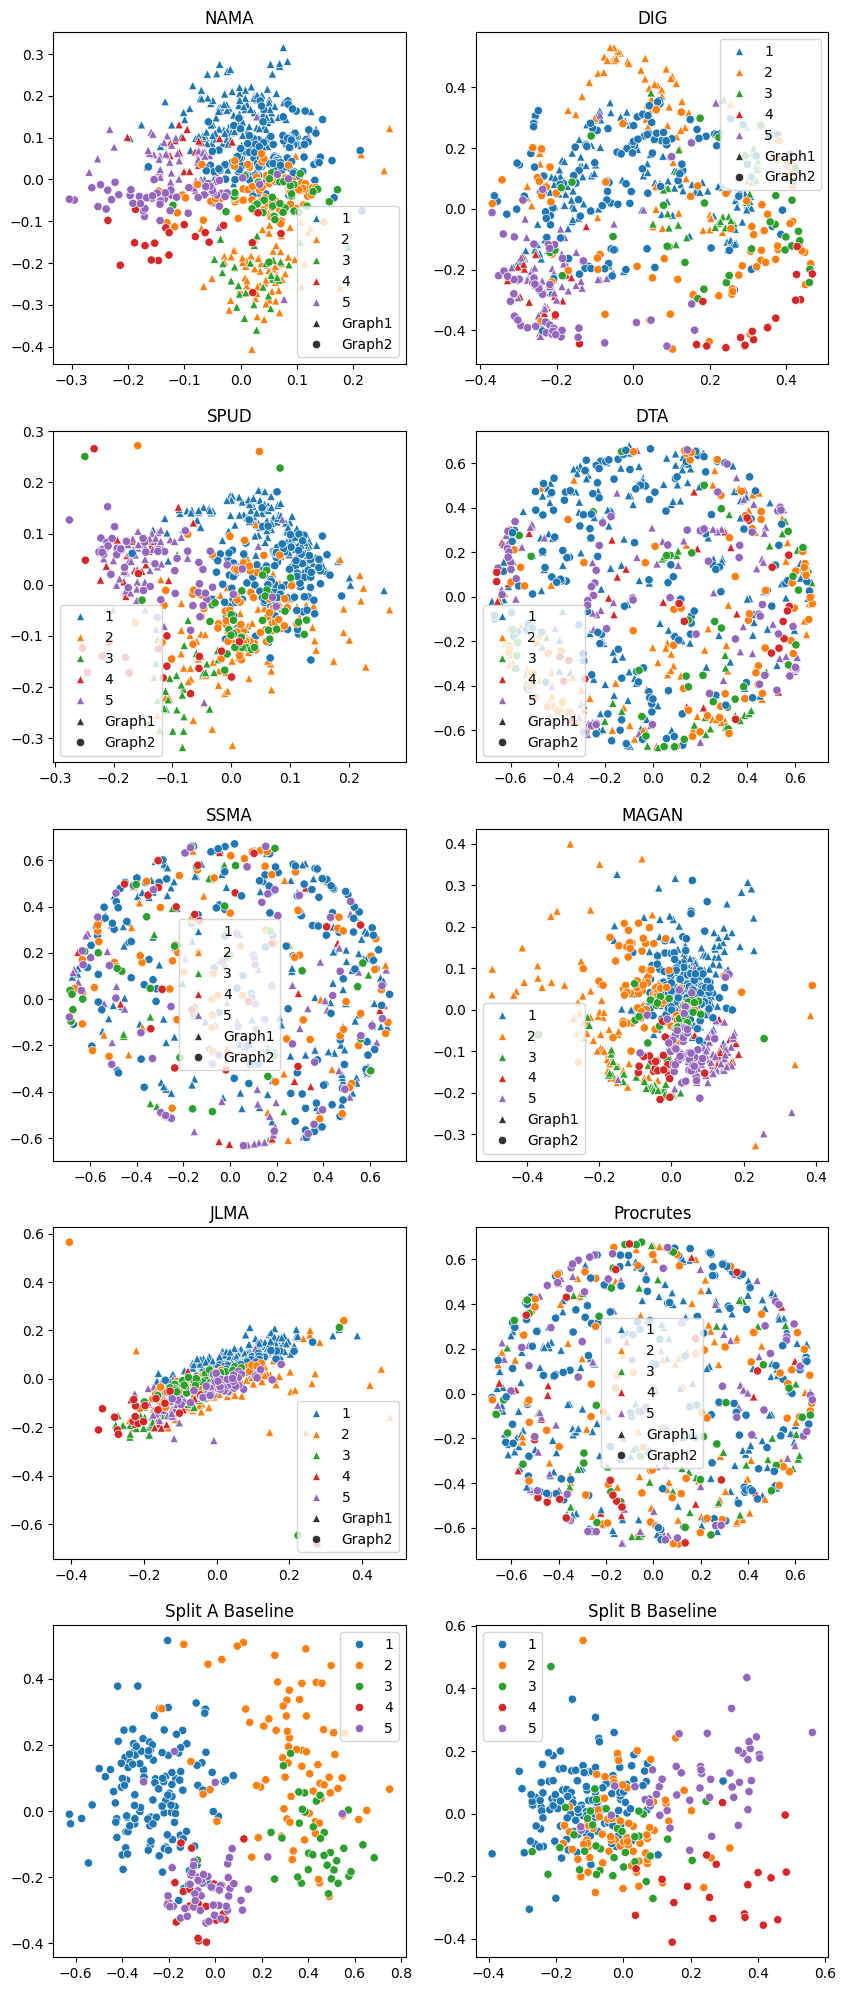

In [64]:
visual_test.plot_embeddings(knn = 5)

# Time Comparisions Below

In [65]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df)

    #Count Instances
    instance_dict[csv_file] = len(df.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df) * len(df.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

,Methods,zoo.csv,hepatitis.csv,iris.csv,audiology.csv,parkinsons.csv,seeds.csv,segmentation.csv,glass.csv,heart_disease.csv,...,titanic.csv,diabetes.csv,tic-tac-toe.csv,Medicaldataset.csv,treeData.csv,winequality-red.csv,car.csv,water_potability.csv,chess.csv,optdigits.csv
0,DIG,2.051146,3.673588,3.401358,6.11107,6.721155,6.336899,7.850724,5.886319,21.008766,...,79.618065,169.862753,247.272338,333.91487,606.335758,670.495568,623.620235,713.969006,2198.150119,2975.556961
1,SPUD,1.979575,3.642993,3.596051,6.817885,6.064839,5.099518,8.601908,8.767957,16.608557,...,49.325496,86.465402,183.209855,364.731992,365.956391,383.02885,473.174882,695.340593,1271.707261,2712.52794
2,SSMA,1.159722,4.248523,4.294494,6.804995,8.124955,11.139338,12.805081,14.13043,28.532746,...,76.844366,98.089042,276.15585,277.443343,506.298484,666.250582,750.995811,994.201673,1721.018906,2350.375657
3,DTA,1.541715,3.795742,4.622846,9.17517,9.272984,11.307132,11.840308,11.141553,35.958692,...,82.645041,202.853388,277.613282,298.365653,565.135435,698.865259,760.982209,306.629771,1741.178858,2519.571152
4,NAMA,2.732113,4.872489,6.227232,14.216228,16.270395,10.448334,15.465682,19.214126,45.309474,...,441.442726,627.065093,1195.106548,3039.580123,3976.05421,5446.704218,6871.173276,10911.287093,46112.782603,85038.966415
5,MAGAN,36.202,60.454023,72.027937,66.887187,63.486195,56.742175,42.748242,61.843572,41.687702,...,54.630012,60.786258,113.20653,27.341562,497.965705,32.816214,407.051648,653.820618,1225.276301,61.125
6,0,101.0,138.0,150.0,190.0,195.0,199.0,211.0,214.0,297.0,...,712.0,768.0,958.0,1319.0,1440.0,1599.0,1728.0,2011.0,3196.0,3823.0
7,Feature Count,18.0,16.0,5.0,68.0,23.0,8.0,20.0,10.0,14.0,...,8.0,9.0,10.0,9.0,61.0,12.0,7.0,11.0,37.0,65.0
8,Complexity,1818.0,2208.0,750.0,12920.0,4485.0,1592.0,4220.0,2140.0,4158.0,...,5696.0,6912.0,9580.0,11871.0,87840.0,19188.0,12096.0,22121.0,118252.0,248495.0


In [66]:
time_df.T.sort_values(by = 6).T.drop(columns = ["Methods"]).mean(axis = 1).sort_values()

7      21.433333
5     146.407922
1     234.785702
3     281.642362
2     287.123525
0     309.506167
6          820.4
4    5526.709339
8        23313.5
dtype: object